Hello this is @Ranjeet_Kumbhar,<br>
Enjoy the Notebook<br>

GitHub:https://github.com/RanjeetKumbhar01/TE_IT_ML_ASSIGNMENTS_SPPU<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/sms%2Bspam%2Bcollection<br>

# Question
Assignment on Improving Performance of Classifier Models<br>
A SMS unsolicited mail (every now and then known as cell smartphone junk mail) is any junk message<br>
brought to a cellular phone as textual content messaging via the Short Message Service (SMS). Use<br>
probabilistic approach (Naive Bayes Classifier / Bayesian Network) to implement SMS Spam Filtering<br>
system. SMS messages are categorized as SPAM or HAM using features like length of message, word<br>
depend, unique keywords etc.<br>
Download Data -Set from : http://archive.ics.uci.edu/ml/datasets/sms+spam+collection<br>
This dataset is composed by just one text file, where each line has the correct class followed by<br>
the raw message.<br>
a. Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if<br>
necessary<br>
b. Perform data-preparation (Train-Test Split)<br>
c. Apply at least two Machine Learning Algorithms and Evaluate Models<br>
d. Apply Cross-Validation and Evaluate Models and compare performance.<br>
e. Apply Hyper parameter tuning and evaluate models and compare performance<br>

In [8]:
import numpy as np
"""
This script imports the necessary libraries for data manipulation and analysis.

Libraries:
- numpy: A fundamental package for scientific computing with Python.
- pandas: A powerful data manipulation and analysis library for Python.

Filepath:
- /c:/Users/Asus/Downloads/TYIT_23_sj/TYIT_23_sj/practical_5/ml-assignment-4-te-it-sppu.ipynb
"""
import pandas as pd

In [9]:
df = pd.read_csv(r'e:\TY\ML\ML LAB\MLCODES\5th\SMSSpamCollection',sep='\t',names=['label','text'])

In [10]:
# Display the dataframe
df

label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

# Data Pre-processing

In [11]:
# Display the shape of the dataframe
df.shape

(5572, 2)

In [12]:
# Importing the nltk library for natural language processing tasks
import nltk #!pip install nltk

In [13]:
nltk.download('stopwords')
"""
Downloads the NLTK stopwords dataset.

This function uses the NLTK library to download the stopwords dataset, which is a collection of common words that are usually filtered out in natural language processing tasks.

Usage:

Note:
    Ensure that you have the NLTK library installed before running this function.
"""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'\nDownloads the NLTK stopwords dataset.\n\nThis function uses the NLTK library to download the stopwords dataset, which is a collection of common words that are usually filtered out in natural language processing tasks.\n\nUsage:\n\nNote:\n    Ensure that you have the NLTK library installed before running this function.\n'

In [14]:
sent = 'How are you friends?'

In [15]:
from nltk.tokenize import word_tokenize
"""
This script tokenizes a given sentence into words using the NLTK library.

Functions:
    word_tokenize(sent): Tokenizes the input sentence into words.

Usage:
    Ensure that the NLTK library is installed and the necessary resources are downloaded.
    Example:
        tokens = word_tokenize("This is a sample sentence.")
"""
word_tokenize(sent)

['How', 'are', 'you', 'friends', '?']

In [16]:
# Import the stopwords module from the Natural Language Toolkit (nltk) library
from nltk.corpus import stopwords
# Get the list of English stopwords
# Stopwords are common words like 'the', 'is', 'in', etc., that are often removed from text data
swords = stopwords.words('english')

In [17]:
clean = [word for word in word_tokenize(sent) if word not in swords]
"""
This list comprehension filters out stopwords from a tokenized sentence.

Args:
    sent (str): The sentence to be tokenized and filtered.
    swords (list): A list of stopwords to be removed from the tokenized sentence.

Returns:
    list: A list of words from the tokenized sentence that are not in the stopwords list.
"""

'\nThis list comprehension filters out stopwords from a tokenized sentence.\n\nArgs:\n    sent (str): The sentence to be tokenized and filtered.\n    swords (list): A list of stopwords to be removed from the tokenized sentence.\n\nReturns:\n    list: A list of words from the tokenized sentence that are not in the stopwords list.\n'

In [18]:
clean

['How', 'friends', '?']

In [19]:
# Stemming words with NLTK
"""
This script demonstrates stemming words using the NLTK library.

The script performs the following steps:
1. Imports the PorterStemmer class from the nltk.stem module.
2. Initializes an instance of the PorterStemmer.
3. Applies stemming to each word in the tokenized sentence, excluding stop words.
4. Stores the stemmed words in the 'clean' list.

Variables:
- ps: An instance of the PorterStemmer class.
- clean: A list of stemmed words from the input sentence.

Note:
- Ensure that 'word_tokenize' and 'swords' are defined elsewhere in the code.
- 'word_tokenize' should tokenize the input sentence into words.
- 'swords' should be a list of stop words to be excluded from stemming.
"""
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) 
         if word not in swords]
clean

['how', 'friend', '?']

In [20]:
sent = 'Hello friends! How are you? We will learning python today'
"""
This script contains a single string variable `sent` which holds a greeting message.
The message includes a greeting, a question about well-being, and a statement about learning Python.
"""

'\nThis script contains a single string variable `sent` which holds a greeting message.\nThe message includes a greeting, a question about well-being, and a statement about learning Python.\n'

In [21]:
def clean_text(sent):
    """
    Cleans and tokenizes the input sentence.

    This function performs the following steps:
    1. Tokenizes the input sentence into words.
    2. Filters out tokens that are neither digits nor alphabetic characters.
    3. Stems the remaining tokens.
    4. Removes stopwords from the stemmed tokens.

    Args:
         sent (str): The input sentence to be cleaned and tokenized.

    Returns:
         list: A list of cleaned and stemmed tokens.
    """
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean
         if word not in swords]
    return clean

In [22]:
clean_text(sent)
"""
Cleans the input text by performing various preprocessing steps.

Parameters:
sent (str): The input text string that needs to be cleaned.

Returns:
str: The cleaned text after preprocessing.
"""

'\nCleans the input text by performing various preprocessing steps.\n\nParameters:\nsent (str): The input text string that needs to be cleaned.\n\nReturns:\nstr: The cleaned text after preprocessing.\n'

In [23]:
# Pre-processing 
"""
This script performs text pre-processing using the TfidfVectorizer from the sklearn library.

Modules:
    sklearn.feature_extraction.text: Provides the TfidfVectorizer class for converting a collection of raw documents to a matrix of TF-IDF features.
"""
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf = TfidfVectorizer(analyzer=clean_text)
"""
This code initializes a TfidfVectorizer with a custom text analyzer function.

Attributes:
    tfidf (TfidfVectorizer): An instance of TfidfVectorizer that uses the `clean_text` function to analyze and transform text data into TF-IDF features.
"""

'\nThis code initializes a TfidfVectorizer with a custom text analyzer function.\n\nAttributes:\n    tfidf (TfidfVectorizer): An instance of TfidfVectorizer that uses the `clean_text` function to analyze and transform text data into TF-IDF features.\n'

In [25]:
x = df['text']
"""
This code snippet extracts two columns from a DataFrame `df`:
- `x` is assigned the values from the 'text' column of the DataFrame.
- `y` is assigned the values from the 'label' column of the DataFrame.

Assumptions:
- `df` is a pandas DataFrame that has already been defined and contains the columns 'text' and 'label'.
"""
y = df['label']

In [26]:
x_new = tfidf.fit_transform(x)
"""
Transforms the input text data into TF-IDF features.

This function uses the `fit_transform` method of the `tfidf` object to convert 
the input text data `x` into a matrix of TF-IDF features. TF-IDF stands for 
Term Frequency-Inverse Document Frequency, which is a numerical statistic 
intended to reflect the importance of a word in a collection of documents.

Returns:
    scipy.sparse.csr.csr_matrix: A matrix of TF-IDF features.
"""

'\nTransforms the input text data into TF-IDF features.\n\nThis function uses the `fit_transform` method of the `tfidf` object to convert \nthe input text data `x` into a matrix of TF-IDF features. TF-IDF stands for \nTerm Frequency-Inverse Document Frequency, which is a numerical statistic \nintended to reflect the importance of a word in a collection of documents.\n\nReturns:\n    scipy.sparse.csr.csr_matrix: A matrix of TF-IDF features.\n'

In [27]:
x.shape
"""
This code snippet retrieves the shape of the array or DataFrame `x`.

Attributes:
    x (numpy.ndarray or pandas.DataFrame): The input array or DataFrame whose shape is to be determined.

Returns:
    tuple: A tuple representing the dimensions of `x`.
"""

'\nThis code snippet retrieves the shape of the array or DataFrame `x`.\n\nAttributes:\n    x (numpy.ndarray or pandas.DataFrame): The input array or DataFrame whose shape is to be determined.\n\nReturns:\n    tuple: A tuple representing the dimensions of `x`.\n'

In [28]:
x_new.shape
"""

Returns the shape of the array `x_new`.

Returns:
    tuple: A tuple representing the dimensions of the array.
"""

'\n\nReturns the shape of the array `x_new`.\n\nReturns:\n    tuple: A tuple representing the dimensions of the array.\n'

In [29]:
# tfidf.get_feature_names()

<Axes: xlabel='label', ylabel='count'>

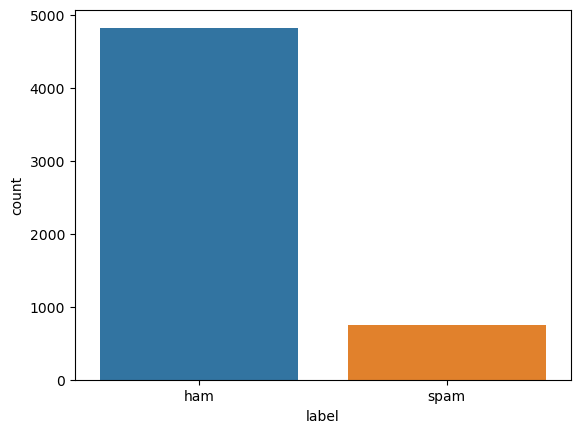

In [30]:
import seaborn as sns
"""
This script imports the seaborn library and creates a count plot.

Functions:
    sns.countplot(x=y): Creates a count plot with the variable `y` on the x-axis.

Note:
    Ensure that the variable `y` is defined and contains categorical data before running this script.
"""
sns.countplot(x=y)

In [31]:
#cross validation
"""
This code performs cross-validation by splitting the dataset into training and testing sets.

Imports:
    from sklearn.model_selection import train_test_split: A function for splitting arrays or matrices into random train and test subsets.

Variables:
    x_new: The input features of the dataset.
    y: The target variable of the dataset.
    x_train: The training set of input features.
    x_test: The testing set of input features.
    y_train: The training set of target variable.
    y_test: The testing set of target variable.

Parameters:
    test_size (float): The proportion of the dataset to include in the test split (0.25 in this case).
    random_state (int): Controls the shuffling applied to the data before applying the split (1 in this case).

Returns:
    x_train, x_test, y_train, y_test: The split datasets for training and testing.
"""
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,random_state=1)

In [32]:
# Print the size of the split data
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")  # Shape of the training set features
print(f"y_train {y_train.shape}")  # Shape of the training set labels
print(f"x_test {x_test.shape}")    # Shape of the test set features
print(f"y_test {y_test.shape}")    # Shape of the test set labels

Size of splitted data
x_train (4179, 6513)
y_train (4179,)
x_test (1393, 6513)
y_test (1393,)


In [33]:
from sklearn.naive_bayes import GaussianNB
"""
This script imports the GaussianNB class from the sklearn.naive_bayes module.
GaussianNB is a Naive Bayes classifier for multivariate normal distribution.
"""

'\nThis script imports the GaussianNB class from the sklearn.naive_bayes module.\nGaussianNB is a Naive Bayes classifier for multivariate normal distribution.\n'

In [34]:
nb = GaussianNB()
"""
This code snippet performs the following operations using the Gaussian Naive Bayes classifier:

1. Initializes a Gaussian Naive Bayes classifier.
2. Fits the classifier to the training data.
3. Predicts the labels for the test data.

Variables:
- nb: An instance of the GaussianNB classifier.
- x_train: The training data features.
- y_train: The training data labels.
- y_pred_nb: The predicted labels for the test data.
- x_test: The test data features.

Note:
- The `toarray()` method is used to convert sparse matrix representations to dense arrays.
"""
nb.fit(x_train.toarray(),y_train)
y_pred_nb = nb.predict(x_test.toarray())

In [35]:
y_test.value_counts()
"""
This code snippet counts the unique values in the y_test series and returns a series with the counts of unique values.

Assumptions:
- y_test is a pandas Series object.

Returns:
- A pandas Series containing counts of unique values in y_test.
"""

'\nThis code snippet counts the unique values in the y_test series and returns a series with the counts of unique values.\n\nAssumptions:\n- y_test is a pandas Series object.\n\nReturns:\n- A pandas Series containing counts of unique values in y_test.\n'

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
"""
This script imports necessary libraries for evaluating and visualizing the performance of a machine learning model.

Imports:
    from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score:
        - ConfusionMatrixDisplay: A tool for visualizing confusion matrices.
        - accuracy_score: A function to compute the accuracy of the model.
    from sklearn.metrics import classification_report:
        - classification_report: A function to generate a detailed classification report.
    import matplotlib.pyplot as plt:
        - plt: A module for creating static, animated, and interactive visualizations in Python.
"""
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

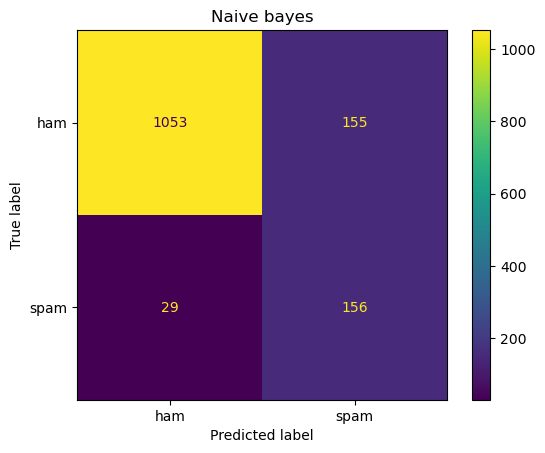

 Accuracy is 0.867910983488873
              precision    recall  f1-score   support

         ham       0.97      0.87      0.92      1208
        spam       0.50      0.84      0.63       185

    accuracy                           0.87      1393
   macro avg       0.74      0.86      0.77      1393
weighted avg       0.91      0.87      0.88      1393



In [37]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
"""
This code snippet displays a confusion matrix for the predictions made by a Naive Bayes classifier, 
sets the title of the plot to 'Naive bayes', and shows the plot. 
It also prints the accuracy score and the classification report for the predictions.

Functions and Methods:
- ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb): 
    Generates a confusion matrix plot from the true labels (y_test) and predicted labels (y_pred_nb).
- plt.title('Naive bayes'): 
    Sets the title of the plot to 'Naive bayes'.
- plt.show(): 
    Displays the plot.
- print(f" Accuracy is {accuracy_score(y_test,y_pred_nb)}"): 
    Prints the accuracy score of the predictions.
- print(classification_report(y_test,y_pred_nb)): 
    Prints the classification report, which includes precision, recall, f1-score, and support for each class.

Parameters:
- y_test: array-like of shape (n_samples,)
    True labels of the test data.
- y_pred_nb: array-like of shape (n_samples,)
    Predicted labels by the Naive Bayes classifier.
"""
plt.title('Naive bayes')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_nb)}")
print(classification_report(y_test,y_pred_nb))

In [38]:
from sklearn.ensemble import RandomForestClassifier
"""
This script demonstrates the use of the RandomForestClassifier from the sklearn.ensemble module.

Steps:
1. Import the RandomForestClassifier from sklearn.ensemble.
2. Create an instance of RandomForestClassifier with a fixed random state for reproducibility.
3. Fit the model to the training data (x_train, y_train).

Variables:
- model_rf: An instance of RandomForestClassifier.
- x_train: Training feature set.
- y_train: Training labels.

Note:
Ensure that x_train and y_train are defined and preprocessed before fitting the model.
"""
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train,y_train)


RandomForestClassifier(random_state=1)

In [39]:
y_pred_rf = model_rf.predict(x_test) #float
"""
Predict the target values using the trained Random Forest model.

This function uses the Random Forest model (`model_rf`) to predict the target values for the test dataset (`x_test`).

Returns:
    numpy.ndarray: The predicted target values as a float array.
"""

'\nPredict the target values using the trained Random Forest model.\n\nThis function uses the Random Forest model (`model_rf`) to predict the target values for the test dataset (`x_test`).\n\nReturns:\n    numpy.ndarray: The predicted target values as a float array.\n'

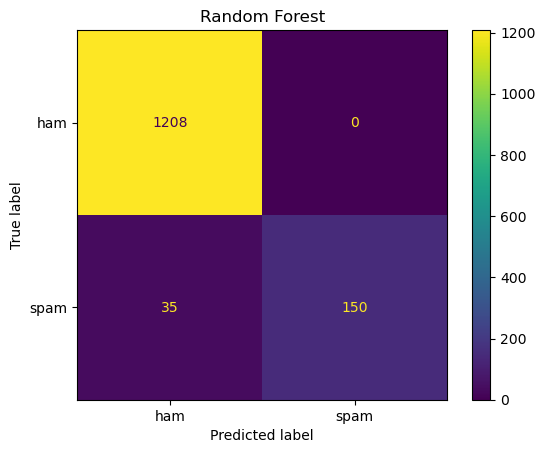

 Accuracy is 0.9748743718592965
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.81      0.90       185

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.97      0.97      1393



In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
"""
This code snippet displays a confusion matrix for the predictions made by a Random Forest classifier,
sets the title of the plot to 'Random Forest', and shows the plot. Additionally, it prints the accuracy
score and the classification report for the predictions.

Functions and Methods:
- ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf): Generates a confusion matrix from the true labels (y_test) and predicted labels (y_pred_rf).
- plt.title('Random Forest'): Sets the title of the plot to 'Random Forest'.
- plt.show(): Displays the plot.
- print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}"): Prints the accuracy score of the predictions.
- print(classification_report(y_test,y_pred_rf)): Prints the classification report, which includes precision, recall, f1-score, and support for each class.

Parameters:
- y_test: Array-like of shape (n_samples,), True labels.
- y_pred_rf: Array-like of shape (n_samples,), Predicted labels by the Random Forest classifier.
"""
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))

In [41]:
from sklearn.linear_model import LogisticRegression
"""
This script performs logistic regression using the scikit-learn library.

Modules:
    from sklearn.linear_model import LogisticRegression: Imports the LogisticRegression class from scikit-learn.

Variables:
    model_lr (LogisticRegression): An instance of the LogisticRegression class with a specified random state.

Functions:
    model_lr.fit(x_train, y_train): Fits the logistic regression model using the training data.
    model_lr.predict(x_test): Predicts the target values for the test data.

Usage:
    Ensure that x_train, y_train, and x_test are defined before running this script.
"""
model_lr = LogisticRegression(random_state=1)

model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)

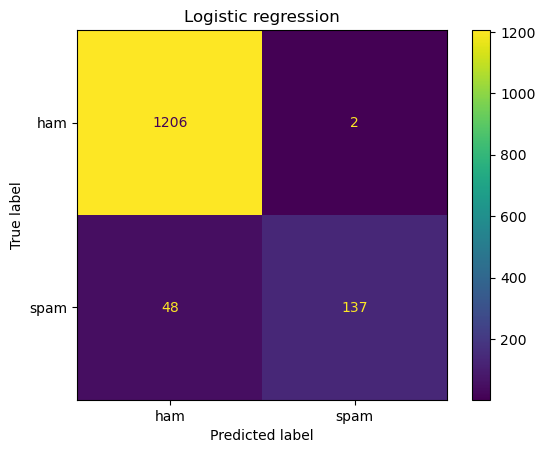

 Accuracy is 0.9641062455132807
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.85       185

    accuracy                           0.96      1393
   macro avg       0.97      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [42]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
"""
This code snippet displays a confusion matrix for logistic regression predictions, 
sets the title of the plot, shows the plot, and prints the accuracy score and 
classification report.

Functions and Methods:
- ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr): Generates a confusion matrix plot from the true labels (y_test) and predicted labels (y_pred_lr).
- plt.title('Logistic regression'): Sets the title of the plot to 'Logistic regression'.
- plt.show(): Displays the plot.
- print(f" Accuracy is {accuracy_score(y_test, y_pred_lr)}"): Prints the accuracy score of the logistic regression model.
- print(classification_report(y_test, y_pred_lr)): Prints the classification report, which includes precision, recall, f1-score, and support for each class.

Parameters:
- y_test: Array-like of shape (n_samples,), True labels.
- y_pred_lr: Array-like of shape (n_samples,), Predicted labels from the logistic regression model.
"""
plt.title('Logistic regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

# Hyper parameter tunning

In [43]:
from sklearn.model_selection import GridSearchCV
"""
This script imports the GridSearchCV class from the sklearn.model_selection module.

GridSearchCV is used for hyperparameter tuning by performing an exhaustive search over specified parameter values for an estimator.
"""

'\nThis script imports the GridSearchCV class from the sklearn.model_selection module.\n\nGridSearchCV is used for hyperparameter tuning by performing an exhaustive search over specified parameter values for an estimator.\n'

In [44]:
# Define the parameter grid for hyperparameter tuning
para = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Criteria for splitting nodes
    # 'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    # 'random_state': [0, 1, 2, 3, 4],  # Seed used by the random number generator
    'class_weight': ['balanced', 'balanced_subsample']  # Weights associated with classes
}

In [45]:
grid = GridSearchCV(model_rf, param_grid=para, cv=5, scoring='accuracy')
"""
Perform a grid search with cross-validation to find the best hyperparameters for the given model.

Parameters:
model_rf : estimator object
    The object of the model for which hyperparameters need to be tuned.
param_grid : dict or list of dictionaries
    Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
cv : int, cross-validation generator or an iterable, default=5
    Determines the cross-validation splitting strategy.
scoring : str, callable, list/tuple, or dict, default='accuracy'
    A single string or a callable to evaluate the predictions on the test set.

Returns:
grid : GridSearchCV object
    The GridSearchCV object after fitting the data with the best found parameters.
"""

"\nPerform a grid search with cross-validation to find the best hyperparameters for the given model.\n\nParameters:\nmodel_rf : estimator object\n    The object of the model for which hyperparameters need to be tuned.\nparam_grid : dict or list of dictionaries\n    Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.\ncv : int, cross-validation generator or an iterable, default=5\n    Determines the cross-validation splitting strategy.\nscoring : str, callable, list/tuple, or dict, default='accuracy'\n    A single string or a callable to evaluate the predictions on the test set.\n\nReturns:\ngrid : GridSearchCV object\n    The GridSearchCV object after fitting the data with the best found parameters.\n"

In [46]:
grid.fit(x_train,y_train)
"""
Fits the grid search model to the training data.

Parameters:
x_train : array-like or sparse matrix of shape (n_samples, n_features)
    The training input samples.
y_train : array-like of shape (n_samples,) or (n_samples, n_outputs)
    The target values (class labels in classification, real numbers in regression).

Returns:
None
"""

'\nFits the grid search model to the training data.\n\nParameters:\nx_train : array-like or sparse matrix of shape (n_samples, n_features)\n    The training input samples.\ny_train : array-like of shape (n_samples,) or (n_samples, n_outputs)\n    The target values (class labels in classification, real numbers in regression).\n\nReturns:\nNone\n'

In [47]:
rf = grid.best_estimator_
"""
Assigns the best estimator from the grid search to the variable `rf`.

Attributes:
    rf (estimator object): The best estimator found by the grid search.

Note:
    This code assumes that `grid.best_estimator_` has been previously defined and is the result of a grid search process.
"""

'\nAssigns the best estimator from the grid search to the variable `rf`.\n\nAttributes:\n    rf (estimator object): The best estimator found by the grid search.\n\nNote:\n    This code assumes that `grid.best_estimator_` has been previously defined and is the result of a grid search process.\n'

In [48]:
y_pred_grid = rf.predict(x_test)
"""
Predict the target values for the test dataset using the trained Random Forest model.

This function uses the `predict` method of the Random Forest model (`rf`) to generate 
predicted target values (`y_pred_grid`) for the provided test dataset (`x_test`).

Returns:
    y_pred_grid (array-like): Predicted target values for the test dataset.
"""

'\nPredict the target values for the test dataset using the trained Random Forest model.\n\nThis function uses the `predict` method of the Random Forest model (`rf`) to generate \npredicted target values (`y_pred_grid`) for the provided test dataset (`x_test`).\n\nReturns:\n    y_pred_grid (array-like): Predicted target values for the test dataset.\n'

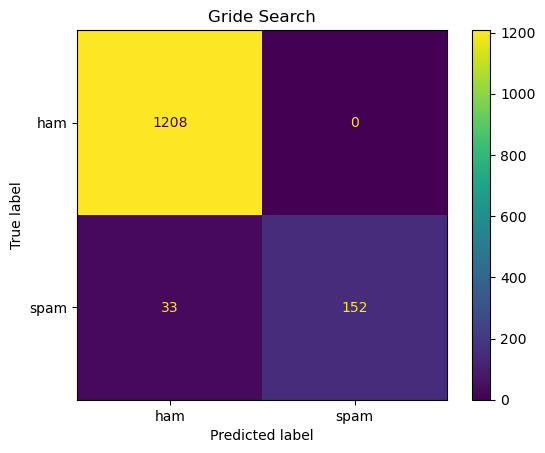

 Accuracy is 0.9763101220387652
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.82      0.90       185

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393



In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid)
"""
Displays a confusion matrix using the predictions and true labels, and prints the accuracy score and classification report.

Parameters:
y_test : array-like of shape (n_samples,)
    True labels of the test data.
y_pred_grid : array-like of shape (n_samples,)
    Predicted labels from the grid search model.

Displays:
- A confusion matrix plot with the title 'Grid Search'.
- The accuracy score of the predictions.
- The classification report including precision, recall, f1-score, and support.
"""
plt.title('Gride Search')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_grid)}")
print(classification_report(y_test,y_pred_grid))